In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Inicialmente é dividir o data set em batch (grupos). O tamanho varia e cabe ajustar conforme problema

In [132]:
data = np.loadtxt(".\Data\data1.txt", delimiter = ",")
x = data[:, 0]
y = data[:, 1]

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\T18228\AppData\Local\Temp\ipykernel_2112\2371076278.py:1: SyntaxWarning: invalid escape sequence '\D'
  data = np.loadtxt(".\Data\data1.txt", delimiter = ",")


In [133]:
def split_batch(features, targets, num_batches):
    x_split = []
    y_split = []
    n = 0

    for i in range(len(features)):
        vazio_x = []
        vazio_y = []
        for j in range(num_batches):
            if n <= len(features) - 1:
                vazio_x.append(features[n])
                vazio_y.append(targets[n])
                n += 1
                
        if len(vazio_x) != 0:
            x_split.append(vazio_x)
            y_split.append(vazio_y)
        
    return x_split, y_split

In [134]:
X, Y = split_batch(x, y, 20)

### O modelo de regressão é dado por:


$$
\hat{y}_i = h_\theta(x_i) = \theta_0 + \theta_1 x_i
$$

### Onde sua função de custo é:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

In [135]:
##Função de custo
def calcular_custo(theta_values, features, targets, samples):
    theta_0 = theta_values[0]
    theta_1 = theta_values[1]
    sigma = 0
    
    for i in range(samples):
        pred = theta_0 + theta_1 * features[i]
        erro = pred - targets[i]
        sigma += erro**2

    return (1/(2*samples)) * sigma

In [136]:
##Calcular o gradiente
def calcular_gradiente(theta_values, features, targets, samples):
    theta_0 = theta_values[0]
    theta_1 = theta_values[1]
    sigma_0 = 0
    sigma_1 = 0

    for i in range(samples):
        pred = theta_0 + theta_1 * features[i]
        erro = pred - targets[i]
        sigma_0 += erro
        sigma_1 += erro * features[i]
        
    grad_theta_0 = (1/samples) * sigma_0
    grad_theta_1 = (1/samples) * sigma_1

    return [grad_theta_0, grad_theta_1]

In [137]:
def atualizar_theta(theta_values, features, targets, samples, learning_rate, num_iters):
    theta_0 = theta_values[0]
    theta_1 = theta_values[1]
    sigma_0 = 0
    sigma_1 = 0
    armazenar_custo = []

    for i in range(num_iters):
        armazenar_custo.append(calcular_custo([theta_0, theta_1], features, targets, samples))
        grad = calcular_gradiente([theta_0, theta_1], features, targets, samples)
        theta_0 = theta_0 - learning_rate * grad[0]
        theta_1 = theta_1 - learning_rate * grad[1]

    return [theta_0, theta_1], armazenar_custo

In [138]:
def executar_minibatch(theta_values, features, targets, learning_rate):
    theta_vector = theta_values
    custo_vector = []
    for i in range(int(len(X))):
        samples = len(X[i])
        theta_vector, custo = atualizar_theta(theta_vector, X[i], Y[i], samples, learning_rate, 1)
        custo_vector.append(custo[0])

    return theta_vector, custo_vector

In [139]:
theta = [0, 0]

In [140]:
a, b = executar_minibatch(theta, X, Y, 0.01)

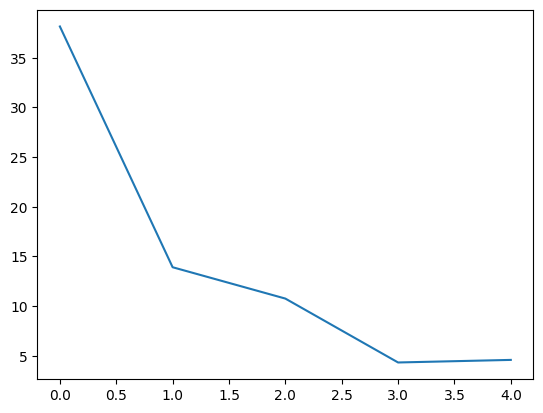

In [141]:
plt.plot(b)

In [142]:
b[-1]

4.596988185969721